<a href="https://colab.research.google.com/github/loicdaloz/etfdata/blob/main/001_DCA_vs_LS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dollar Cost Averagering (DCA) versus Lump Sum (LS)**

When given a set amount of money to invest, no matter the amount, the first question that comes in mind is when to allocate the money, the question asked is "Should I invest all the money now or over a period of time?"
Dollar Cost Averagering strategy (DCA) is an investment strategy that came to light thanks to Benjamin Graham and his book "The Intelligent Investor" published in 1949 and has the main objective to lower the total average cost per share of an investment.
On the opposite the Lump Sum strategy is the act of investing all the available money at once.
Here is the visual representation of investing $12,000 according to both stategy:

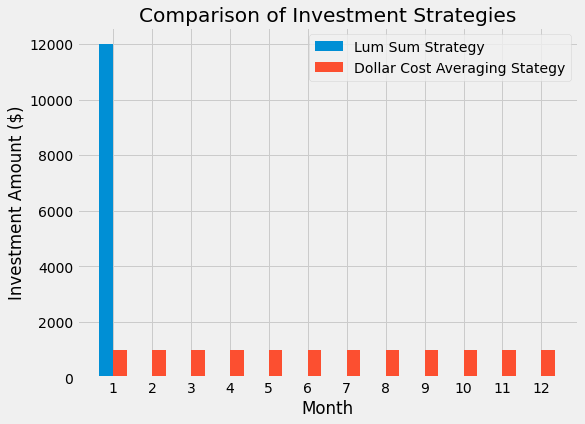

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define the investment amounts for each strategy
strategy1 = [12000] + [0] * 11
strategy2 = [1000] * 12

# Create the bar chart
x = np.arange(1, 13)
width = 0.35
fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, strategy1, width, label='Lum Sum Strategy')
rects2 = ax.bar(x + width/2, strategy2, width, label='Dollar Cost Averaging Stategy')
ax.set_xlabel('Month')
ax.set_ylabel('Investment Amount ($)')
ax.set_title('Comparison of Investment Strategies')
ax.set_xticks(x)
ax.legend()
plt.show()



With the Lump Sum (LS) stategy you will invest the 120,000 during the first month in a single investment of the same amount, while using the Dollar Cost Averaging (DCA) Stategy only $10,000 will be invested during the first month and it will be followed by 11 other equal sized payments over the next month for a DCA stategy of 1 year.

The main advantage described by DCA enthusiasts is the reduction of the risk by extending the period of investment which make the investment value less prone to high market fluctuaction on the downside (crashes)


---


The objective of this data analysis is to compare both investement stategies with historical data

I will be using the SPY ticker as it gives a good representation of the US market in its composition


---


Limitation of the analysis: To simplify the analysis we are considering that the remaning cash that is not invested for the DCA stategy remain in cash, meaning that the return of the remaning cash is 0% while it can be theorically invested in risk free assets

In [3]:
#Import Libraries used for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load SPY Data
#SPY data is sources from Yahoo Finance and only Adjusted close will be used for the analysis
from google.colab import files
files.upload()

In [5]:
#Read SPY data
asset = pd.read_csv('SPY.csv')
#Set date as index
asset = asset.set_index(pd.DatetimeIndex(asset['Date'].values))
#Show data
asset

,Date,Open,High,Low,Close,Adj Close,Volume
1993-01-29,1993-01-29,43.968750,43.968750,43.750000,43.937500,25.122353,1003200
1993-02-01,1993-02-01,43.968750,44.250000,43.968750,44.250000,25.301016,480500
1993-02-02,1993-02-02,44.218750,44.375000,44.125000,44.343750,25.354616,201300
1993-02-03,1993-02-03,44.406250,44.843750,44.375000,44.812500,25.622656,529400
1993-02-04,1993-02-04,44.968750,45.093750,44.468750,45.000000,25.729858,531500
...,...,...,...,...,...,...,...
2023-03-15,2023-03-15,385.890015,389.489990,383.709991,389.279999,387.799957,172996900
2023-03-16,2023-03-16,386.820007,396.470001,386.290009,396.109985,394.603973,143254200
2023-03-17,2023-03-17,393.220001,394.399994,388.549988,389.989990,389.989990,140047400
2023-03-20,2023-03-20,390.799988,394.170013,390.070007,393.739990,393.739990,93055800


Text(0, 0.5, 'Adj. Close Price (USD)')

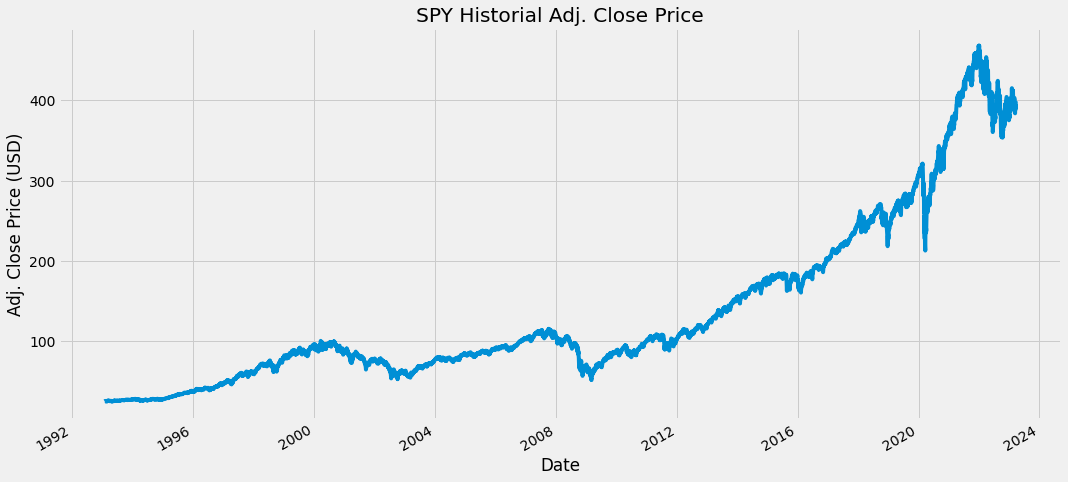

In [6]:
#Show the data visually to reflect SPY Adj close price
asset['Adj Close'].plot(figsize = (16,8))
plt.title('SPY Historial Adj. Close Price')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price (USD)')

In [7]:
#Calculate and Show LS investment strategy
#Get adj close prices from dataset
adj_close_price = asset['Adj Close']
#Choose initial investment amount
initial_investment = 12000
#Get last price value of the SPDR within data set
stock_latest_value = adj_close_price[-1]
#Get number of share bought on each date with hypothetical investment amount aka LS
num_shares_bought = initial_investment / adj_close_price
#Calculate how much money you would have according to the last price in this dataset for investing a LS on a given date in the past
lump_sum = stock_latest_value * num_shares_bought
#Show data
lump_sum

1993-01-29    190544.255468
1993-02-01    189198.728146
1993-02-02    188798.759484
1993-02-03    186823.725378
1993-02-04    186045.334879
                  ...      
2023-03-15     12343.786949
2023-03-16     12130.947420
2023-03-17     12274.469014
2023-03-20     12157.566337
2023-03-21     12000.000000
Name: Adj Close, Length: 7590, dtype: float64

This table show what would $12000 invested at a certain date would be worth today (last adjusted close price available in the dataset).

The table do not take into account inflation

In [9]:
#Compute and show best and worst day possible in our dataset to invest $12000 with a lump sum strategy
print('The best day to invest $'+str(initial_investment)+ ' using a Lump Sum strategy was on '+lump_sum.idxmax().strftime('%b %d %Y')+ ' and would be worth $'+str(round(lump_sum.max(), 2))+ ' on '+lump_sum.last_valid_index().strftime('%b %d %Y'))
print('The worst day to invest $'+str(initial_investment)+ ' using a Lump Sum strategy was on '+lump_sum.idxmin().strftime('%b %d %Y')+ ' and would be worth $'+str(round(lump_sum.min(), 2))+ ' on '+lump_sum.last_valid_index().strftime('%b %d %Y'))

The best day to invest $12000 using a Lump Sum strategy was on Feb 18 1993 and would be worth $192876.41 on Mar 21 2023
The worst day to invest $12000 using a Lump Sum strategy was on Jan 03 2022 and would be worth $10221.99 on Mar 21 2023


Text(0, 0.5, 'Investment Value in USD')

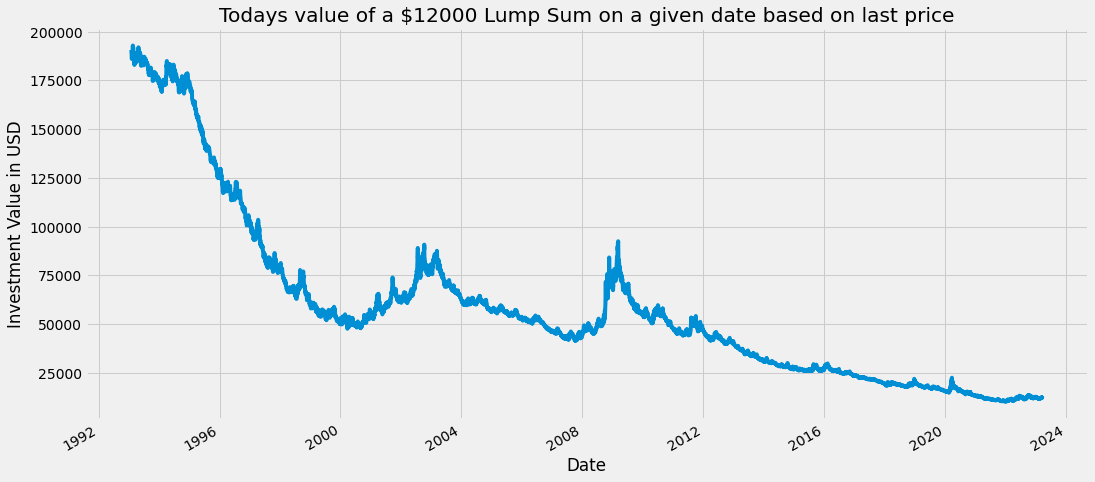

In [11]:
#Plot LS Data
lump_sum.plot(figsize=(16,8))
plt.title('Todays value of a $'+str(initial_investment)+' Lump Sum on a given date based on last price')
plt.xlabel('Date')
plt.ylabel('Investment Value in USD')

In [13]:
#Create a function to calculate the DCA Stategy
def DCA(start_date, initial_investment):
    #Determine the investment periods, which will be every 12 months
    investment_date_periods = 12.0

    #Calculate the amount invested in each period
    investment_portion = initial_investment / investment_date_periods

    #Get the dates of the investment periods using a pandas date range
    all_investment_dates = pd.date_range(start_date, periods = investment_date_periods, freq = '30D')

    #Filter out any investment dates that come after the last date in the dataset
    investment_dates = all_investment_dates[all_investment_dates < asset.index[-1]]

    #Find the indices (and corresponding dates) within the dataset that are closest to the investment dates,
    #since the stock market is not open every day
    closest_investment_dates = asset.index.searchsorted(investment_dates)

    #Get a list of stock prices at the closest investment dates
    stock_prices = asset['Adj Close'][closest_investment_dates]

    #Calculate the total number of shares invested in by summing all the share purchases on each of the investment dates
    total_shares_invested = sum(investment_portion / stock_prices)

    #Calculate the amount of cash that was not invested from the initial investment amount
    uninvested_cash = investment_portion * sum(all_investment_dates >= asset.index[-1])

    #Calculate the total value of the investment, including any uninvested cash and the current value of the shares
    total = uninvested_cash + asset['Adj Close'][-1] * total_shares_invested
    
    #Return the final total value of the investment
    return total

In [14]:
#Execute DCA function

#Create an empty list to store the total values of the DCA investment at each date
DCA_List = []

#Loop through each date in the asset index, which represents the historical prices of the asset
for date in asset.index:
    DCA_List.append( DCA(date, initial_investment))

In [15]:
#Convert the list of DCA values into a pandas DataFrame
dca = pd.DataFrame()
dca['DCA'] = DCA_List

#Set the date as the index of the DataFrame, using the same dates as in the asset index
dca = dca.set_index(pd.DatetimeIndex(asset.index))

#Convert the DataFrame into a pandas Series by "squeezing" it
#This removes any extra dimensions and returns a 1-dimensional Series instead of a 2-dimensional DataFrame
dca = dca.squeeze()

#Display the resulting Series containing the DCA values over time
dca

1993-01-29    182271.886976
1993-02-01    182141.163699
1993-02-02    182193.726242
1993-02-03    182230.605077
1993-02-04    181911.248652
                  ...      
2023-03-15     12028.648912
2023-03-16     12010.912285
2023-03-17     12022.872418
2023-03-20     12013.130528
2023-03-21     12000.000000
Name: DCA, Length: 7590, dtype: float64

In [16]:
#Compute and show best and worst day initiating DCA
print('Best day to start DCA a $'+str(initial_investment)+ ' investment was on '+dca.idxmax().strftime('%b %d %Y')+ ' and would be worth $'+str(round(dca.max(), 2))+ ' on '+dca.last_valid_index().strftime('%b %d %Y'))
print('worst day to start DCA a $'+str(initial_investment)+ ' investment was on '+dca.idxmin().strftime('%b %d %Y')+ ' and would be worth $'+str(round(dca.min(), 2))+ ' on '+dca.last_valid_index().strftime('%b %d %Y'))

Best day to start DCA a $12000 investment was on Feb 23 1993 and would be worth $182587.75 on Mar 21 2023
worst day to start DCA a $12000 investment was on Jul 07 2021 and would be worth $11001.17 on Mar 21 2023


Text(0, 0.5, 'Investment Value(USD)')

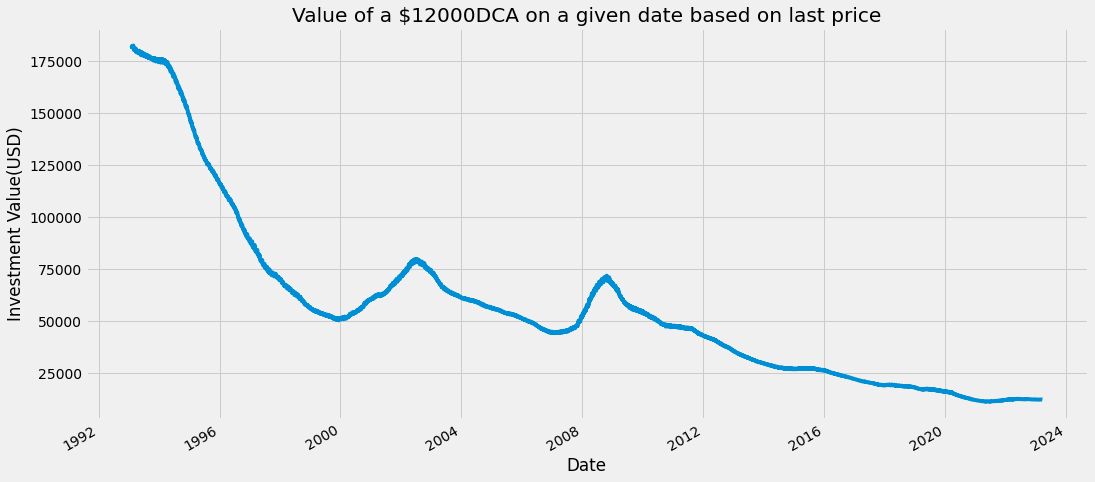

In [17]:
#Plot DCA
dca.plot(figsize = (16,8))
plt.title('Value of a $'+str(initial_investment)+'DCA on a given date based on last price')
plt.xlabel('Date')
plt.ylabel('Investment Value(USD)')

In [18]:
#Calculate the volatility of the lump sum investment using the percent change and standard deviation functions
#This measures how much the investment's value fluctuated over time
lump_sum_vol = lump_sum.pct_change().std()

#Calculate the volatility of the DCA investment using the percent change and standard deviation functions
#This measures how much the investment's value fluctuated over time
dca_vol = dca.pct_change().std()

#Display the resulting volatilities of the lump sum and DCA investments
print('Lump Sum volatility:', lump_sum_vol)
print('DCA volatility:', dca_vol)

Lump Sum volatility: 0.011948212077778415
DCA volatility: 0.003685271916006582


Even though the risk ratio suggests that the lump sum investment is about 3.24 times riskier than the DCA investment, it's worth noting that both investments have relatively low volatility

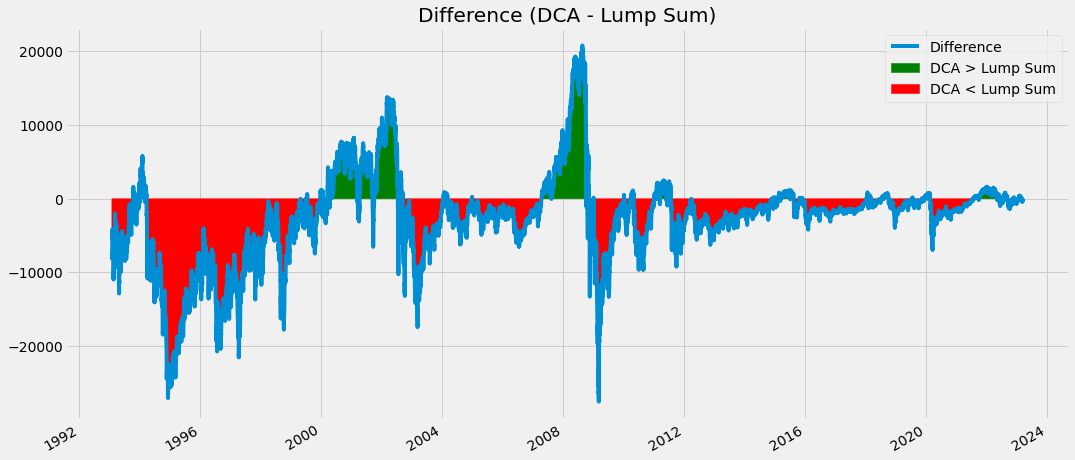

In [19]:
#Calculate the difference in portfolio value between DCA and lump sum investment strategies
difference = dca - lump_sum

#Plot the difference over time
difference.plot(figsize = (16,8), label = 'Difference')

#Fill the area above zero with green to indicate periods when DCA outperformed lump sum
plt.fill_between(difference.index, y1 = difference, y2 = 0, color = 'green', where = difference>0, label = 'DCA > Lump Sum')

#Fill the area below zero with red to indicate periods when lump sum outperformed DCA
plt.fill_between(difference.index, y1 = difference, y2 = 0, color = 'red', where = difference<0, label = 'DCA < Lump Sum')

#Add a title to the plot and a legend to explain the colored areas
plt.title('Difference (DCA - Lump Sum)')
plt.legend()


This code generates a plot that shows the difference in portfolio value between the DCA and lump sum investment strategies over time. The green and red shaded areas above and below the x-axis represent periods when DCA outperformed lump sum and when lump sum outperformed DCA, respectively.

The results are quite explainatory as the only period where DCA is outperforming LS is when the market is crashing

In [20]:
# Calculate the win percentage for each strategy
lump_sum_win_percentage = round( sum(difference<0) / len(difference) * 100, 1)
dca_win_percentage = round( sum(difference>0) / len(difference) * 100, 1)

# Print the win percentages for each strategy
print('Percentage of time that Lump Sum returns more than DCA: ' + str(lump_sum_win_percentage) + '%')
print('Percentage of time that DCA returns more than Lump Sum: ' + str(dca_win_percentage) + '%')


Percentage of time that Lump Sum returns more than DCA: 76.5%
Percentage of time that DCA returns more than Lump Sum: 23.5%
